In [1]:
import sys
stdout = sys.stdout
reload(sys)
sys.setdefaultencoding('utf-8')
sys.stdout = stdout

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
def percentilX(series,x):
    m=series.quantile(x)
    return m

In [3]:
def remueve_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    piso  = q1-1.5*iqr
    techo = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > piso) & (df_in[col_name] < techo)]
    return df_out

In [4]:
casen=pd.read_stata('/Casen 2015.dta',encoding='latin-1')

In [5]:
casen.head(3)

,folio,o,id_vivienda,region,provincia,comuna,zona,hogar,tot_hog,tot_par,...,hh_d_estado,hh_d_servbas,hh_d_entorno,hh_d_accesi,hh_d_medio,hh_d_appart,hh_d_tsocial,hh_d_seg,pobreza_multi_4d,pobreza_multi_5d
0,1.101100e+10,1,1.101100e+09,región de tarapacá,iquique,iquique,urbano,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,no pobre,no pobre
1,1.101100e+10,2,1.101100e+09,región de tarapacá,iquique,iquique,urbano,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,no pobre,no pobre
2,1.101100e+10,3,1.101100e+09,región de tarapacá,iquique,iquique,urbano,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,no pobre,no pobre


In [6]:
df=casen[['yaut','r22','e6a']]
len(df)
a=df.isnull()
a

,yaut,r22,e6a
0,True,False,False
1,True,True,False
2,True,True,False
3,True,True,False
4,True,True,False
5,False,False,False
6,False,False,False
7,False,False,False
8,True,True,False
9,False,False,False


In [7]:
df2=df.dropna(axis=0, how='any')
len(df2)

78882

In [8]:
df2.r22.value_counts()

femenino             44360
masculino            34479
otro. especifique       37
sin dato                 6
Name: r22, dtype: int64

In [9]:
df2.yaut.isnull().value_counts()

False    78882
Name: yaut, dtype: int64

In [10]:
df.e6a.value_counts()

educación básica                                                69496
educación media científico-humanista                            67948
educación media técnica profesional                             21299
profesional completo (carreras 4 ó más años)                    17225
primaria o preparatoria (sistema antiguo)                       16624
nunca asistió                                                   15997
profesional incompleto (carreras 4 ó más años)                  14784
técnico nivel superior completo (carreras 1 a 3 años)           11076
humanidades (sistema antiguo)                                    7678
prekinder / kinder (transición menor y transición mayor)         6791
técnico nivel superior incompleto (carreras 1 a 3 años)          6701
jardín infantil (medio menor y medio mayor)                      4537
técnica, comercial, industrial o normalista (sistema antiguo     1987
postgrado completo                                               1582
sala cuna           

In [11]:
df.e6a

0                      educación media científico-humanista
1                             humanidades (sistema antiguo)
2            profesional incompleto (carreras 4 ó más años)
3            profesional incompleto (carreras 4 ó más años)
4            profesional incompleto (carreras 4 ó más años)
5                      educación media científico-humanista
6                      educación media científico-humanista
7                      educación media científico-humanista
8                      educación media científico-humanista
9                                          educación básica
10                                         educación básica
11                     educación media científico-humanista
12                                         educación básica
13        prekinder / kinder (transición menor y transic...
14                            humanidades (sistema antiguo)
15                            humanidades (sistema antiguo)
16                                      

In [12]:
df2.columns=['ingresoAutonomoMensual','Genero','nivelEducacional']

In [14]:
#Filtra solo hombres y mujeres
df2=df2.loc[(df2.Genero=='masculino')| (df2.Genero=='femenino')]
#Excluye los "no sabe / no contesta" en género

In [19]:
df_filtrado=df2.loc[(df2.Genero.isnull()==False),]
df_filtrado['logIngresoAutonomoMensual']=np.log(df_filtrado.ingresoAutonomoMensual)
df_filtrado.head()

,ingresoAutonomoMensual,Genero,nivelEducacional,logIngresoAutonomoMensual
5,320000.0,masculino,educación media científico-humanista,12.676076
6,400000.0,masculino,educación media científico-humanista,12.899220
7,375000.0,masculino,educación media científico-humanista,12.834681
9,500000.0,femenino,educación básica,13.122363
16,400000.0,femenino,educación básica,12.899220


In [29]:
sueldoHombres=df_filtrado.loc[df_filtrado.Genero=='masculino',('logIngresoAutonomoMensual')]
sueldoMujeres=df_filtrado.loc[df_filtrado.Genero=='femenino',('logIngresoAutonomoMensual')]


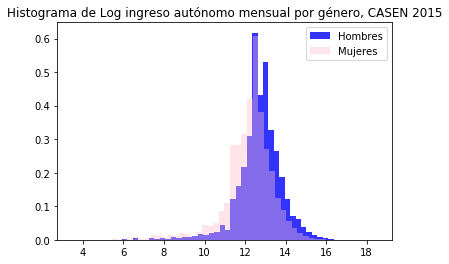

In [30]:
plt.hist(x=logSueldoHombres,bins=50,color='blue',alpha=0.8,normed=True,
         cumulative=False)
plt.hist(x=logSueldoMujeres,bins=50,color='pink',alpha=0.4,normed=True,
         cumulative=False)
plt.title('Histograma de Log ingreso autónomo mensual por género, CASEN 2015')
plt.legend(['Hombres','Mujeres'])
plt.show()

In [31]:
# Test de Anderson Darling para comprobar si sueldo de Hombres y mujeres tiene la misma distribución
stats.ks_2samp(sueldoHombres, sueldoMujeres)

Ks_2sampResult(statistic=0.22665668594396182, pvalue=0.0)

Se rechaza la hipótesis nula, es decir, ** no hay evidencia que indique que hombres y mujeres estén ganando el mismo ingreso autónomo**

Esto se refuerza al observar la mediana del ingreso autónomo por máximo nivel de educación formal alcanzado:

In [32]:
df2.columns

Index([u'ingresoAutonomoMensual', u'Genero', u'nivelEducacional'], dtype='object')

In [34]:
df3=pd.DataFrame(df2.groupby(['nivelEducacional','Genero'])['ingresoAutonomoMensual'].\
                 agg({'Mediana en $ del ingreso autónomo mensual según Género y Nivel Educacional, CASEN 2015':'median'})).unstack()



In [37]:
df3/1000

Mediana en $ del ingreso autónomo mensual según Género y Nivel Educacional, CASEN 2015  \
Genero                                                                                                                          masculino   
nivelEducacional                                                                                                                            
nunca asistió                                                                                160.0835                                       
educación especial (diferencial)                                                             240.0000                                       
primaria o preparatoria (sistema antiguo)                                                    171.6300                                       
educación básica                                                                             260.0000                                       
humanidades (sistema antiguo)                                                                250.0000                                       
educación media científico-humanista                                                         355.9170                                       
técnica, comercial, industrial o normalista (si...                                           362.1670                                       
educación media técnica profesional                                                          400.0000                                       
técnico nivel superior incompleto (carreras 1 a...                                           400.0000                                       
técnico nivel superior completo (carreras 1 a 3...                                           593.3330                                       
profesional incompleto (carreras 4 ó más años)                                               450.0000                                       
profesional completo (carreras 4 ó más años)                                                1000.0000                                       
postgrado incompleto                                                                        1431.6670                                       
postgrado completo                                                                          2000.0000                                       
sin dato                                                                                     334.5835                                       

                                                               
Genero                                               femenino  
nivelEducacional                                               
nunca asistió                                        129.0000  
educación especial (diferencial)                     124.5000  
primaria o preparatoria (sistema antiguo)            144.0000  
educación básica                                     150.0000  
humanidades (sistema antiguo)                        176.8000  
educación media científico-humanista                 240.0000  
técnica, comercial, industrial o normalista (si...   220.0000  
educación media técnica profesional                  257.9165  
técnico nivel superior incompleto (carreras 1 a...   275.2500  
técnico nivel superior completo (carreras 1 a 3...   400.0000  
profesional incompleto (carreras 4 ó más años)       281.9165  
profesional completo (carreras 4 ó más años)         662.0835  
postgrado incompleto                                 874.9165  
postgrado completo                                  1212.5000  
sin dato                                             241.1250